Plot of tune space
---
Based on script provided by H. Bartosik, previously (I think) from G. Iadarola of CERN ABP

In [1]:
import os
import numpy as np
import scipy.io as sio
import pylab as plt

In [2]:
class resonance_lines(object):

    def __init__(self, Qx_range, Qy_range, orders, periodicity):

        if np.std(Qx_range):
            self.Qx_min = np.min(Qx_range)
            self.Qx_max = np.max(Qx_range)
        else:
            self.Qx_min = np.floor(Qx_range)-0.05
            self.Qx_max = np.floor(Qx_range)+1.05
        if np.std(Qy_range):
            self.Qy_min = np.min(Qy_range)
            self.Qy_max = np.max(Qy_range)
        else:
            self.Qy_min = np.floor(Qy_range)-0.05
            self.Qy_max = np.floor(Qy_range)+1.05

        self.periodicity = periodicity

        nx, ny = [], []

        for order in np.nditer(np.array(orders)):
            t = np.array(range(-order, order+1))
            nx.extend(order - np.abs(t))
            ny.extend(t)
        nx = np.array(nx)
        ny = np.array(ny)

        cextr = np.array([nx*np.floor(self.Qx_min)+ny*np.floor(self.Qy_min), \
                          nx*np.ceil(self.Qx_max)+ny*np.floor(self.Qy_min), \
                          nx*np.floor(self.Qx_min)+ny*np.ceil(self.Qy_max), \
                          nx*np.ceil(self.Qx_max)+ny*np.ceil(self.Qy_max)], dtype='int')
        cmin = np.min(cextr, axis=0)
        cmax = np.max(cextr, axis=0)
        res_sum = [range(cmin[i], cmax[i]+1) for i in range(cextr.shape[1])]
        self.resonance_list = zip(nx, ny, res_sum)

    def plot_resonance_ax(self, ax1):
        # Remove Borders
        #ax1.spines['top'].set_visible(False);
        #ax1.spines['bottom'].set_visible(False);
        #ax1.spines['left'].set_visible(False);
        #ax1.spines['right'].set_visible(False);
        #ax1.axes.get_yaxis().set_visible(False); 
        #ax1.axes.get_xaxis().set_visible(False);  
        
        Qx_min = self.Qx_min
        Qx_max = self.Qx_max
        Qy_min = self.Qy_min
        Qy_max = self.Qy_max 
        ax1.set_xlim(Qx_min, Qx_max);
        ax1.set_ylim(Qy_min, Qy_max);        
        ax1.set_xlabel('Qx')
        ax1.set_ylabel('Qy')

        for resonance in self.resonance_list:
            nx = resonance[0]
            ny = resonance[1]
            for res_sum in resonance[2]:
                if ny:                    
                    
                    if ny%2:                                                  
                        if res_sum%self.periodicity:
                            ax1.plot([Qx_min, Qx_max], [(res_sum-nx*Qx_min)/ny, (res_sum-nx*Qx_max)/ny], ls='--', color='b')
                        else:
                            ax1.plot([Qx_min, Qx_max], [(res_sum-nx*Qx_min)/ny, (res_sum-nx*Qx_max)/ny], ls='--', color='r', lw=2)               
                        
                    else:
                        if res_sum%self.periodicity:
                            ax1.plot([Qx_min, Qx_max], [(res_sum-nx*Qx_min)/ny, (res_sum-nx*Qx_max)/ny], color='b')
                        else:
                            ax1.plot([Qx_min, Qx_max], [(res_sum-nx*Qx_min)/ny, (res_sum-nx*Qx_max)/ny], color='r', lw=2)
                else:                
                    if res_sum%self.periodicity:
                        ax1.plot([np.float(res_sum)/nx, np.float(res_sum)/nx],[Qy_min, Qy_max], color='b')
                    else:
                        ax1.plot([np.float(res_sum)/nx, np.float(res_sum)/nx],[Qy_min, Qy_max], color='r', lw=2)
    
    def plot_resonance_fig(self, figure_object = None):
        plt.ion()
        if figure_object:
            fig = figure_object
            plt.figure(fig.number)
        else:
            fig = plt.figure()
        Qx_min = self.Qx_min
        Qx_max = self.Qx_max
        Qy_min = self.Qy_min
        Qy_max = self.Qy_max 
        plt.xlim(Qx_min, Qx_max)
        plt.ylim(Qy_min, Qy_max)
        plt.xlabel('Qx')
        plt.ylabel('Qy')
        for resonance in self.resonance_list:
            nx = resonance[0]
            ny = resonance[1]
            for res_sum in resonance[2]:
                if ny:
                    line, = plt.plot([Qx_min, Qx_max], \
                        [(res_sum-nx*Qx_min)/ny, (res_sum-nx*Qx_max)/ny])
                else:
                    line, = plt.plot([np.float(res_sum)/nx, np.float(res_sum)/nx],[Qy_min, Qy_max])
                    
                    
                    
                if ny%2:
                    plt.setp(line, linestyle='--') # for skew resonances
                if res_sum%self.periodicity:
                    plt.setp(line, color='b') # non-systematic resonances
                else:
                    plt.setp(line, color='r', linewidth=2.0) # systematic resonances
        plt.draw()
        return fig
    
    def print_resonances(self):
        for resonance in self.resonance_list:
            for res_sum in resonance[2]:
                print_string =  '%s %s%s = %s\t%s'%(str(resonance[0]).rjust(2), ("+", "-")[resonance[1]<0], \
                        str(abs(resonance[1])).rjust(2), str(res_sum).rjust(4), \
                        ("(non-systematic)", "(systematic)")[res_sum%self.periodicity==0])
                print(print_string)


## Using  plot_resonance_ax only controls the axis - you will have to manually add labels and ticks etc on the figure level

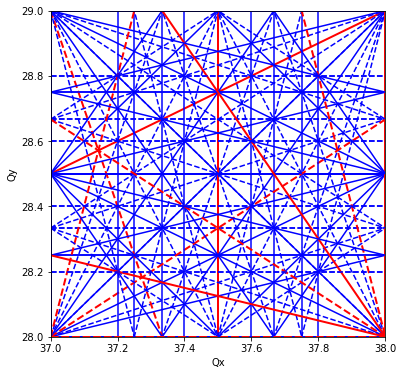

In [3]:
f, ax = plt.subplots(1,figsize=(6,6))

#resonances = resonance_lines((x_min, x_max),(y_min, y_max),(individiual resonance orders), periodicity)
resonances = resonance_lines((37., 38.),(28., 29.),(1,2,3,4,5),10)

resonances.plot_resonance_ax(ax)

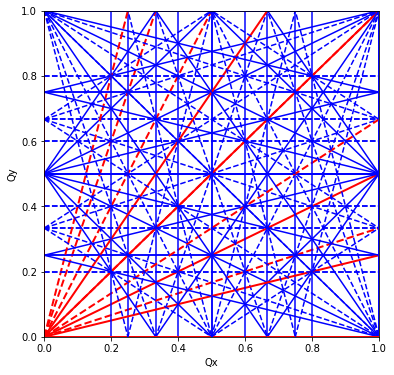

In [4]:
f, ax = plt.subplots(1,figsize=(6,6))

#resonances = resonance_lines((x_min, x_max),(y_min, y_max),(individiual resonance orders), periodicity)
resonances = resonance_lines((0., 1.),(0., 1.),(1,2,3,4,5),10)

resonances.plot_resonance_ax(ax)

## Old method (unchanged) plots 2 figures for some reason

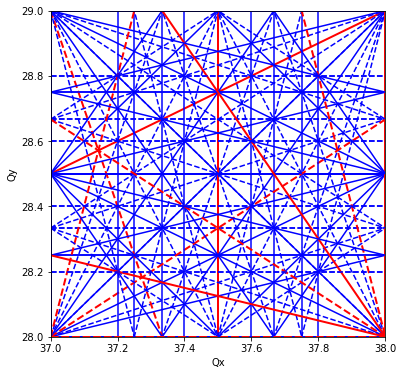

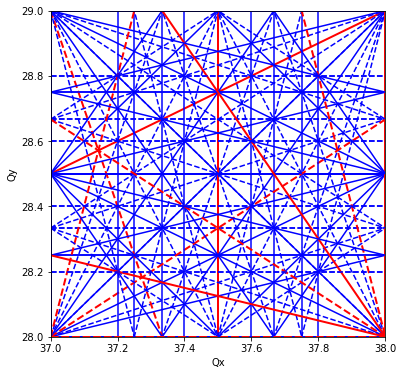

In [5]:
f, ax = plt.subplots(1,figsize=(6,6))

#resonances = resonance_lines((x_min, x_max),(y_min, y_max),(individiual resonance orders), periodicity)
resonances = resonance_lines((37., 38.),(28., 29.),(1,2,3,4,5),10)

resonances.plot_resonance_fig(f)

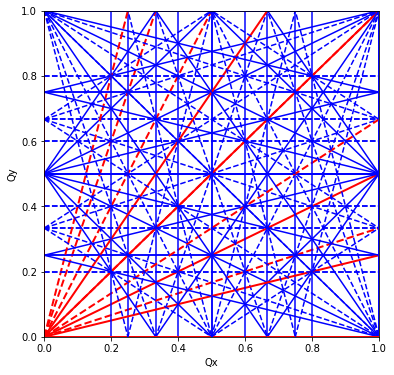

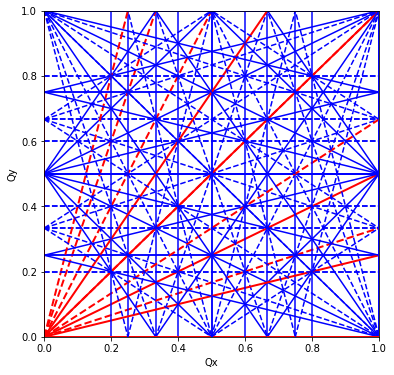

In [6]:
f, ax = plt.subplots(1,figsize=(6,6))

#resonances = resonance_lines((x_min, x_max),(y_min, y_max),(individiual resonance orders), periodicity)
resonances = resonance_lines((0., 1.),(0., 1.),(1,2,3,4,5),10)

resonances.plot_resonance_fig(f)